# Stat. Methods of Data Analysis Exercise 10\
## A. Confidence limits for Poisson processes (10 Points)

In this problem, we want to derive “by hand” the confidence intervals (CIs, e.g. lower and upper limits) for a basic counting experiment which can be modelled by a Poisson process with mean $\lambda$.

1. Confidence interval for a given expectation value. Write a program that lists, for fixed values of $\lambda = 1, 2,$ ...$12$, the number of observed events $n$ such that at most 10% of the probability are 

    (i) above n, 
    
    (ii) below n, 
    
    (iii) above n and below n′ (central confidence interval).

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import poisson

In [59]:
# (i) above n
# probabiltiy for value to be above n (1-poisson.cdf(k=n, mu) <= 0.1 and as close as possible to 0.1
def lower_bound(mu):    
    prob = []
    for n in range(20):
        p = 0.1-(1-poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.1
        if p >= 0:         #avoiding to find the upper closest value to 0.1
            prob.append(p)
        else:
            prob.append(1)
    lower_bound = np.argmin(prob)
    return(lower_bound)
    #print(prob)
    #print(lower_bound, -prob[lower_bound]+0.1)

#(ii) below n : probabiltiy for value to be below n (poisson.cdf(k=n, mu) <= 0.1
def upper_bound(mu):    
    prob = []
    for n in range(20):
        p = 0.1-(poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.1
        if p >= 0:         #avoiding to find the upper closest value to 0.1
            prob.append(p)
        else:
            prob.append(1)
    upper_bound = np.argmin(prob)
    return(upper_bound)    
#(iii) above n and below n′ (central confidence interval).
def central_confidence_interval(mu):
    prob1 = []
    for n in range(20):
        p = 0.05-(poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.05
        if p >= 0:         #avoiding to find the upper closest value to 0.05
            prob1.append(p)
        else:
            prob1.append(1)
    prob2 = []
    for n in range(20):
        p = 0.05-(1-poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.05
        if p >= 0:         #avoiding to find the upper closest value to 0.05
            prob2.append(p)
        else:
            prob2.append(1) 
            
    upper_bound = np.argmin(prob2)        
    lower_bound = np.argmin(prob1)
    return([upper_bound,  lower_bound])  

Text(0, 0.5, 'n value where at most 10% of the events are above')

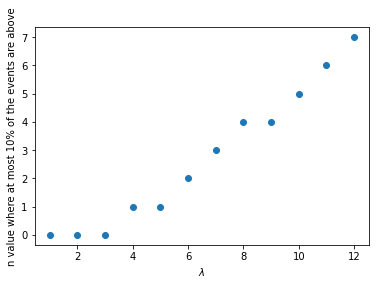

In [53]:
meanlist = np.linspace(1,12,12)
upper_bounds = []
for mu in meanlist:
    upper_bounds.append(upper_bound(mu))
plt.plot(meanlist, upper_bounds, "o")  
plt.xlabel(r"$\lambda$")
plt.ylabel("n value where at most 10% of the events are above")

Text(0, 0.5, 'number of observed events  $n$ at most 10% below n ')

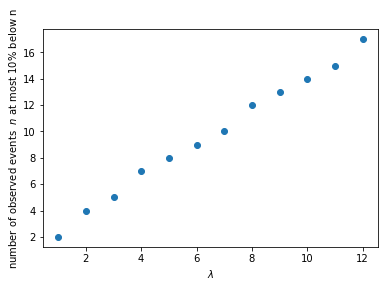

In [52]:
lower_bounds = []
for mu in meanlist:
    lower_bounds.append(lower_bound(mu))
plt.plot(meanlist, lower_bounds, "o")  
plt.xlabel(r"$\lambda$")
plt.ylabel("n value where at most 10% of the events are above")

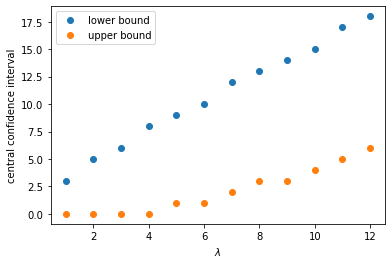

In [63]:
lower, upper = [], []
for mu in meanlist:
    low, up = central_confidence_interval(mu)
    lower.append(low)
    upper.append(up)
plt.plot(meanlist, lower, "o", label = "lower bound")  
plt.plot(meanlist, upper, "o", label = "upper bound") 
plt.xlabel(r"$\lambda$")
plt.ylabel("central confidence interval")
plt.legend()

2. Confidence interval given a measured value. In a similar spirit, write a program that lists, for fixed number of observed events n = 0, 1, 2, ...12, the 

    (i) upper, 

    (ii) lower, and 

    (iii) central CIs on $\lambda$ at 90% CL. 

Describe the conceptual difference between this case and that discussed in part 1.


In [87]:
# (i) above n
# probabiltiy for value to be above n (1-poisson.cdf(k=n, mu) <= 0.1 and as close as possible to 0.1
def lower_bound2(n):    
    prob = []
    for mu in range(20):
        p = 0.1-(1-poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.1
        if p >= 0:         #avoiding to find the upper closest value to 0.1
            prob.append(p)
        else:
            prob.append(1)
    mean = np.argmin(prob)
    return(mean)
    #print(prob)
    #print(lower_bound, -prob[lower_bound]+0.1)

#(ii) below n : probabiltiy for value to be below n (poisson.cdf(k=n, mu) <= 0.1
def upper_bound2(n):    
    prob = []
    for mu in range(20):
        p = 0.1-(poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.1
        if p >= 0:         #avoiding to find the upper closest value to 0.1
            prob.append(p)
        else:
            prob.append(1)
    mean = np.argmin(prob)
    return(mean)    
#(iii) above n and below n′ (central confidence interval).
def central_confidence_interval2(n):
    prob1 = []
    prob2 = []
    for mu in range(30):
        p = 0.05-(poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.05
        if p >= 0:         #avoiding to find the upper closest value to 0.05
            prob1.append(p)
        else:
            prob1.append(1)
    for mu in range(30):
        p = 0.05-(1-poisson.cdf(k=n, mu=mu)) #finding the value closest to 0.05
        if p >= 0:         #avoiding to find the upper closest value to 0.05
            prob2.append(p)
        else:
            prob2.append(1) 
    upper_mean = np.argmin(prob2)        
    lower_mean = np.argmin(prob1)        
    return([lower_mean, upper_mean])  

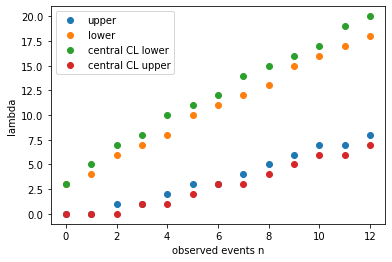

In [88]:
events = np.linspace(0,12,13)
meanlist_i = []
meanlist_ii = []
meanlist_iii = [[],[]]
for n in events:
    meanlist_i.append(lower_bound2(n))
    meanlist_ii.append(upper_bound2(n))
    lower, upper = central_confidence_interval2(n)
    meanlist_iii[0].append(lower)
    meanlist_iii[1].append(upper)
plt.plot(events, meanlist_i, "o", label = "upper")
plt.plot(events, meanlist_ii, "o", label = "lower")
plt.plot(events, meanlist_iii[0], "o", label = "central CL lower")
plt.plot(events, meanlist_iii[1], "o", label = "central CL upper")
plt.xlabel("observed events n")
plt.ylabel("lambda")
plt.legend()

 I am a bit confused here, I think i and ii are okay, but iii is just weird. 

## B. Confidence limits for Poisson processes in the context of a counting experiment(10 Points)
1. Establishing the presence of signal. Is this a significant (= 3$\sigma$) excess to establish the presence of signal? In other words, calculate the probability of observing $n_{obs} = 5$ or more events assuming the presence of background only with the expectation value is $\lambda_B = 1.8$ using Poisson statistics.

$$p(n\geq n_{obs})= \sum_{n=n_{obs}}^{\inf} p(n;\lambda_S =0;\lambda_B)=1 − \sum_{n=0}^{n_{obs}} \lambda_B^n/n! \exp(−\lambda_B) $$

In [89]:
1 - poisson.cdf(k=5, mu=1.8)

0.010378036866159568

2. Upper limit on the number of signal events. Determine an upper limit $\lambda_{max}$ S for the number of signal events at a 95% CL. Such a limit is defined by the expected number of signal events $\lambda_{max}$ where the probability of measuring nobs or fewer events reaches 5% assuming a Poisson statistic with mean $\lambda_B$ + $\lambda_{max}$. To (numerically) find the S answer, perform an interval search starting from the probabilities to observe $n_B +n_{min}$ S and $n_B +n_{max}$ or less events. Stop the search when the uncertainty, i.e. the difference S of the limits of the interval, is less than $10^{−5}$.